In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score


In [3]:
df = pd.read_csv("Bangalore_Ride_Data.csv")

In [5]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Canceled Rides by Customer,Reason for Canceling by Customer,Canceled Rides by Driver,Reason for Canceling by Driver,Incomplete Rides,Incomplete Rides Reason,Ride Distance,Driver Ratings,Customer Rating,Booking Value
0,2025-02-25,03:51:00,CNR5504782822,Incomplete,CUST75425,Prime Plus,Kammanahalli,Kanakapura Road,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2025-02-09,16:40:00,CNR3253789959,Success,CUST38166,Mini,Koramangala,Hennur,5.252919,14.488404,0.0,NaN,0.0,NaN,0.0,NaN,26.863051,3.6,4.1,1146.0
2,2025-02-11,11:10:00,CNR8972285069,Success,CUST58509,Prime Sedan,RT Nagar,Banashankari,10.763076,3.927896,0.0,NaN,0.0,NaN,0.0,NaN,12.154382,3.8,3.5,206.0
3,2025-02-04,00:05:00,CNR5192849379,Success,CUST37690,Auto,Ulsoor,Marathahalli,14.448712,11.418812,0.0,NaN,0.0,NaN,0.0,NaN,10.018572,4.7,4.8,133.0
4,2025-02-02,00:37:00,CNR9906394440,Success,CUST74907,Mini,Benson Town,Electronic City,7.012095,10.824990,0.0,NaN,0.0,NaN,0.0,NaN,21.552017,3.8,4.6,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2025-02-11,20:38:00,CNR1444304369,NaN,CUST63124,Prime Plus,Shantinagar,KR Puram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,2025-02-04,17:05:00,CNR2495041526,NaN,CUST24108,Bike,Varthur,Kanakapura Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,2025-02-25,13:25:00,CNR2535148283,NaN,CUST51428,eBike,Electronic City,Bannerghatta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,2025-02-22,17:50:00,CNR7089651018,NaN,CUST71099,Prime Sedan,Jakkur,BTM Layout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              20000 non-null  object 
 1   Time                              20000 non-null  object 
 2   Booking ID                        20000 non-null  object 
 3   Booking Status                    18600 non-null  object 
 4   Customer ID                       20000 non-null  object 
 5   Vehicle Type                      20000 non-null  object 
 6   Pickup Location                   20000 non-null  object 
 7   Drop Location                     20000 non-null  object 
 8   Avg VTAT                          12400 non-null  float64
 9   Avg CTAT                          12400 non-null  float64
 10  Canceled Rides by Customer        18600 non-null  float64
 11  Reason for Canceling by Customer  1172 non-null   object 
 12  Canc

In [8]:
df.isna().sum()

Date                                    0
Time                                    0
Booking ID                              0
Booking Status                       1400
Customer ID                             0
Vehicle Type                            0
Pickup Location                         0
Drop Location                           0
Avg VTAT                             7600
Avg CTAT                             7600
Canceled Rides by Customer           1400
Reason for Canceling by Customer    18828
Canceled Rides by Driver             1400
Reason for Canceling by Driver      17102
Incomplete Rides                     1400
Incomplete Rides Reason             19098
Ride Distance                        7600
Driver Ratings                       7600
Customer Rating                      7600
Booking Value                        7600
dtype: int64

In [10]:
df3 = df.drop(['Date', 
               'Time', 
               'Customer ID', 
               'Pickup Location', 
               'Drop Location', 
               'Avg VTAT', 
               'Avg CTAT', 
               'Canceled Rides by Customer', 
               'Reason for Canceling by Customer', 
               'Canceled Rides by Driver','Reason for Canceling by Driver', 
                   'Incomplete Rides', 'Incomplete Rides Reason', 'Customer Rating', 'Booking Value'], axis = 1)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Booking ID      20000 non-null  object 
 1   Booking Status  18600 non-null  object 
 2   Vehicle Type    20000 non-null  object 
 3   Ride Distance   12400 non-null  float64
 4   Driver Ratings  12400 non-null  float64
dtypes: float64(2), object(3)
memory usage: 781.4+ KB


In [12]:
df3.isna().sum()

Booking ID           0
Booking Status    1400
Vehicle Type         0
Ride Distance     7600
Driver Ratings    7600
dtype: int64

In [13]:
df3.sample(10)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
1994,CNR1216105255,Success,eBike,5.959513,4.6
19604,CNR6615988367,NaN,Auto,NaN,NaN
11591,CNR2489889903,Driver Canceled,Prime Sedan,NaN,NaN
19917,CNR8958732275,NaN,Bike,NaN,NaN
14274,CNR2634975376,Success,Prime SUV,24.074092,3.1
16078,CNR6573934286,Incomplete,Mini,NaN,NaN
2150,CNR2948895306,Success,Prime SUV,8.239778,3.1
9313,CNR4893156057,Success,Auto,14.209649,3.7
13553,CNR5420134292,Driver Canceled,Prime Sedan,NaN,NaN
17298,CNR6482170468,Success,Prime SUV,11.361688,3.5


In [14]:
def fill_ride_distance(row):
    if pd.isna(row['Ride Distance']):  # Check for NaN first
        if row['Booking Status'] in ('Driver Canceled', 'Customer Canceled'):
            return 0  # Set ride distance to 0 if cancelled
        elif row['Booking Status'] == 'Incomplete':
            return np.random.randint(1, 10)  # Generate a random value between 1 and 9
        else:
            return 0  # Or any other default value for NaN
    else:
        return row['Ride Distance']  # Keep the original value if not NaN

# Apply the function to each row
df3['Ride Distance'] = df3.apply(fill_ride_distance, axis=1)



In [15]:
df3.sample(10)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
1691,CNR7274243389,Success,Bike,17.185189,3.8
18969,CNR1525210930,NaN,Prime SUV,0.000000,NaN
3251,CNR1008981941,Success,Prime Plus,27.004093,3.4
1980,CNR1527458145,Success,Bike,12.391207,4.5
1847,CNR3917143203,Success,Prime Plus,5.381624,3.2
19163,CNR7058113773,NaN,Prime SUV,0.000000,NaN
18828,CNR5655779413,NaN,Bike,0.000000,NaN
1086,CNR1855144218,Driver Canceled,Auto,0.000000,NaN
17223,CNR7314164542,Driver Canceled,Prime SUV,0.000000,NaN
9152,CNR4073202224,Driver Canceled,Auto,0.000000,NaN


In [16]:
df3["Booking Status"].value_counts()

Booking Status
Success              12400
Driver Canceled       3600
Customer Canceled     1400
Incomplete            1200
Name: count, dtype: int64

In [17]:
df3.sample(10)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
3109,CNR7897459128,Success,Prime Sedan,26.734446,4.3
12376,CNR1191731864,Success,Prime Plus,23.306072,4.3
15828,CNR4747917103,Success,eBike,27.958406,3.7
1338,CNR4417883610,Driver Canceled,Prime Plus,0.000000,NaN
8788,CNR8455823128,Success,eBike,25.930974,4.8
5117,CNR6746813438,Success,Mini,7.196517,4.1
1524,CNR7130799870,Success,Prime Sedan,23.511550,4.7
14145,CNR9245525330,Driver Canceled,Prime Sedan,0.000000,NaN
15003,CNR5098831890,Success,Prime Sedan,16.858622,3.4
18053,CNR5346157776,Incomplete,eBike,6.000000,NaN


In [18]:
df3['Driver Ratings'].fillna(df3.groupby('Vehicle Type')['Driver Ratings'].transform('mean'), inplace=True)


C:\Users\TANMAY\AppData\Local\Temp\ipykernel_25892\4113512891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Driver Ratings'].fillna(df3.groupby('Vehicle Type')['Driver Ratings'].transform('mean'), inplace=True)


In [19]:
df3.sample(10)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
5828,CNR2569724750,Success,Prime SUV,9.069865,3.000000
1705,CNR1429795146,Success,Prime Sedan,25.807332,3.000000
14332,CNR5268278737,Success,Prime Plus,7.678577,3.900000
18713,CNR3198036858,NaN,Prime SUV,0.000000,3.983647
11521,CNR6743165860,Success,Prime Plus,22.259609,5.000000
9664,CNR9428424978,Success,Auto,23.262420,3.200000
12567,CNR6814846020,Driver Canceled,Mini,0.000000,4.021002
6885,CNR7341832960,Success,Prime Sedan,5.199511,3.600000
18125,CNR4897025014,Success,Bike,16.503948,4.700000
17902,CNR6968413003,Success,Prime Plus,5.971887,3.300000


In [20]:
df3.isna().sum()

Booking ID           0
Booking Status    1400
Vehicle Type         0
Ride Distance        0
Driver Ratings       0
dtype: int64

In [21]:
df3.sample(10)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
2090,CNR4278263808,Success,Auto,19.916577,3.500000
3269,CNR6761729401,Success,Prime Sedan,5.087927,4.200000
5349,CNR2189302511,Success,Mini,11.814281,4.400000
14908,CNR1911832848,Success,Prime Plus,25.149738,3.300000
5508,CNR9830944463,Driver Canceled,Prime SUV,0.000000,3.983647
5715,CNR8835940603,Driver Canceled,Mini,0.000000,4.021002
19822,CNR9194364489,NaN,Bike,0.000000,3.997346
16851,CNR8391775379,Driver Canceled,Mini,0.000000,4.021002
13356,CNR8067261487,Success,Bike,22.264257,3.900000
2964,CNR1463061787,Success,Auto,8.254944,4.500000


In [22]:
df3 = df3.dropna(subset=['Booking Status'])


In [23]:
df3.isna().sum()

Booking ID        0
Booking Status    0
Vehicle Type      0
Ride Distance     0
Driver Ratings    0
dtype: int64

In [24]:
df["Booking Status"].value_counts()

Booking Status
Success              12400
Driver Canceled       3600
Customer Canceled     1400
Incomplete            1200
Name: count, dtype: int64

# CLASSIFICATION ANALYSIS

In [38]:
df3.sample(15)

,Booking ID,Booking Status,Vehicle Type,Ride Distance,Driver Ratings
13625,CNR8392943967,1,4,0.000000,3.983647
13908,CNR4199585650,1,3,0.000000,4.000795
2591,CNR6782317406,3,2,26.226067,3.600000
17913,CNR1166181427,3,5,28.627749,4.200000
5293,CNR6858570149,3,5,24.803687,4.900000
14431,CNR9956496365,1,4,0.000000,3.983647
17831,CNR9876849760,0,5,0.000000,3.994354
6367,CNR2817576113,1,4,0.000000,3.983647
14565,CNR5297519911,1,2,0.000000,4.021002
5132,CNR8764278183,3,1,13.458391,3.300000


In [45]:
df3 = df3.drop('Booking ID', axis=1)

KeyError: "['Booking ID'] not found in axis"

In [46]:
#For classification analysis I've chosen the 'Booking Status' column as the target variable and the rest of the columns as feature variables.

X = df3.drop('Booking Status', axis=1)  # Features
Y = df3['Booking Status']             # Target variable

In [47]:
# Encode categorical variables
label_enc = LabelEncoder()
df3["Vehicle Type"] = label_enc.fit_transform(df3["Vehicle Type"])
df3["Booking Status"] = label_enc.fit_transform(df3["Booking Status"])  # Target variable encoding

In [48]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [49]:
X_train

,Vehicle Type,Ride Distance,Driver Ratings
15718,2,0.000000,4.021002
6885,5,5.199511,3.600000
1979,6,0.000000,4.011273
6380,3,10.961013,4.500000
8135,0,0.000000,3.987236
...,...,...,...
9272,6,24.021572,4.000000
7037,0,0.000000,3.987236
17039,2,6.929707,3.500000
16835,5,17.358579,4.900000


In [69]:
Y_train

15718    1
6885     3
1979     1
6380     3
8135     1
        ..
9272     3
7037     0
17039    3
16835    3
16181    3
Name: Booking Status, Length: 13020, dtype: int32

In [70]:
X_test

,Vehicle Type,Ride Distance,Driver Ratings
4298,2,0.000000,4.021002
3885,4,7.115402,4.600000
2795,1,5.275051,4.600000
12898,4,25.180471,3.600000
17645,3,25.108206,3.500000
...,...,...,...
8803,2,0.000000,4.021002
357,5,17.654686,4.700000
4887,5,17.076435,3.700000
6694,2,0.000000,4.021002


In [71]:
Y_test

4298     1
3885     3
2795     3
12898    3
17645    3
        ..
8803     1
357      3
4887     3
6694     1
16729    3
Name: Booking Status, Length: 5580, dtype: int32

In [74]:
(X_train.equals(X_test), Y_train.equals(Y_test))

(False, False)

In [77]:
print(X_train.shape)
print(X_test.shape)

(13020, 3)
(5580, 3)


In [78]:
print(sample_weights)

[1.29166667 0.375      1.29166667 ... 0.375      0.375      0.375     ]


In [79]:
print((dt_preds == rf_preds).all())  # Should be False
print((dt_preds == xgb_preds).all())  # Should be False
print((rf_preds == xgb_preds).all())  # Should be False

True
True
True


In [80]:
print(pd.DataFrame(X_train).corr())

                Vehicle Type  Ride Distance  Driver Ratings
Vehicle Type        1.000000       0.002660        0.008329
Ride Distance       0.002660       1.000000        0.010653
Driver Ratings      0.008329       0.010653        1.000000


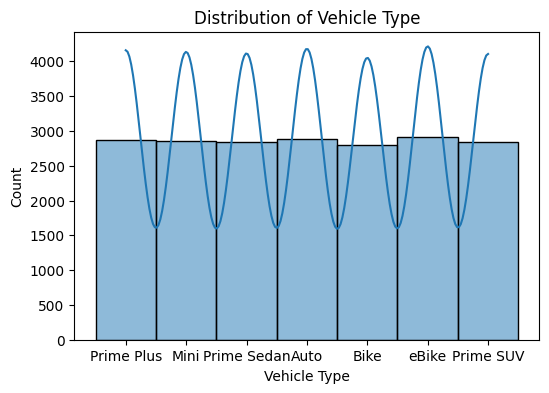

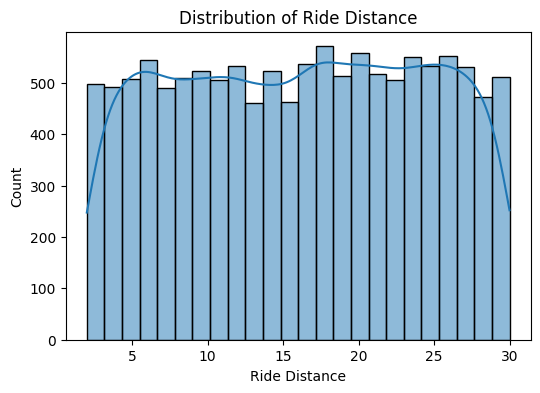

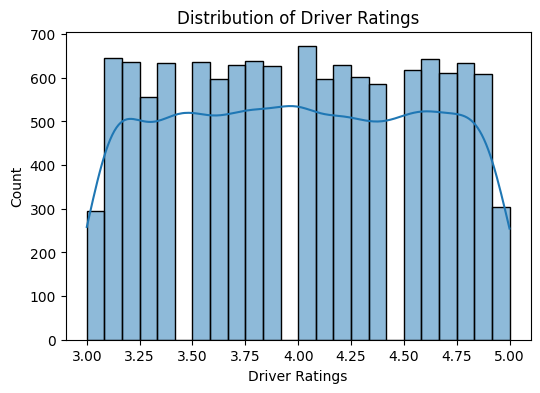

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

df4 = pd.DataFrame(X_train, columns=["Vehicle Type", "Ride Distance", "Driver Ratings"])
for col in df4.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: xlabel='Vehicle Type', ylabel='count'>

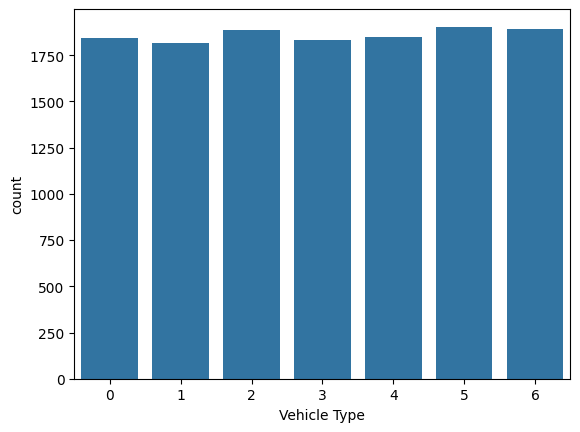

In [82]:
sns.countplot(x=df4["Vehicle Type"])


In [84]:
print(class_weight_dict)
print(set(sample_weights))  # Should have different values

print(rf_model.feature_importances_)
print(xgb_model.feature_importances_)


{0: 3.3214285714285716, 1: 1.2916666666666667, 2: 3.875, 3: 0.375}
{0.375, 1.2916666666666667, 3.875, 3.3214285714285716}
[0.00428296 0.64612396 0.34959308]
[0.00093001 0.8910536  0.10801639]


In [64]:
# Compute class weights for Decision Tree & Random Forest
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(Y_train), y=Y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Compute scale_pos_weight for XGBoost
scale_pos_weight = max(class_weights) / min(class_weights)  # Balancing weight

# Compute sample weights for XGBoost
sample_weights = compute_sample_weight(class_weight="balanced", y=Y_train)

In [65]:
# Initialize models with class weights
dt_model = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model = XGBClassifier(
    objective="multi:softmax",  # Set multi-class classification objective
    num_class=len(np.unique(Y_train)),  # Ensure correct number of classes
    scale_pos_weight= scale_pos_weight,  # Use computed class balancing weight
    eval_metric="mlogloss",
    random_state=42
)

In [85]:
# Train models
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
# xgb_model.fit(X_train, Y_train, sample_weight=sample_weights)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

In [86]:
# Make predictions
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models
def evaluate_model(name, Y_test, preds):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(Y_test, preds))
    print(classification_report(Y_test, preds))

evaluate_model("Decision Tree", Y_test, dt_preds)
evaluate_model("Random Forest", Y_test, rf_preds)
evaluate_model("XGBoost", Y_test, xgb_preds)


Decision Tree Performance:
Accuracy: 0.8621863799283154
              precision    recall  f1-score   support

           0       0.29      0.58      0.39       420
           1       0.73      0.45      0.56      1080
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00      3720

    accuracy                           0.86      5580
   macro avg       0.76      0.76      0.74      5580
weighted avg       0.90      0.86      0.87      5580


Random Forest Performance:
Accuracy: 0.8621863799283154
              precision    recall  f1-score   support

           0       0.29      0.58      0.39       420
           1       0.73      0.45      0.56      1080
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00      3720

    accuracy                           0.86      5580
   macro avg       0.76      0.76      0.74      5580
weighted avg       0.90      0.86      0.87      5580


XGBoost Perform

C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TANMAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,